In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_excel('teoporiskfactors.xlsx') 

In [4]:
df.head(3)

measure_id measure_name  location_id location_name  sex_id sex_name  \
0           1       Deaths          195       Namibia       1     Male   
1           1       Deaths          195       Namibia       2   Female   
2           1       Deaths          195       Namibia       1     Male   

   age_id     age_name  cause_id cause_name  rei_id              rei_name  \
0     159  10-24 years       494     Stroke     108  High body-mass index   
1     159  10-24 years       494     Stroke     108  High body-mass index   
2     159  10-24 years       494     Stroke     108  High body-mass index   

   metric_id metric_name  year       val     upper     lower  
0          2     Percent  2012  0.005154  0.024124 -0.004212  
1          2     Percent  2012  0.019004  0.060940  0.000080  
2          2     Percent  2013  0.005538  0.023858 -0.004467

In [5]:
# Get the total number of elements in the DataFrame
total_elements = df.size
print(total_elements)

# Get the dimensions of the DataFrame (rows, columns)
dimensions = df.shape
print(dimensions)

108000
(6000, 18)


In [6]:
# Check for missing values
print(df.isnull().sum())

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
rei_id           0
rei_name         0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64


In [7]:
display(df.describe())

measure_id  location_id       sex_id       age_id  cause_id  \
count  6000.000000       6000.0  6000.000000  6000.000000    6000.0   
mean      2.500000        195.0     1.500000    34.853333     494.0   
std       1.118127          0.0     0.500042    56.283684       0.0   
min       1.000000        195.0     1.000000    10.000000     494.0   
25%       1.750000        195.0     1.000000    13.000000     494.0   
50%       2.500000        195.0     1.500000    17.000000     494.0   
75%       3.250000        195.0     2.000000    30.000000     494.0   
max       4.000000        195.0     2.000000   235.000000     494.0   

            rei_id  metric_id         year          val        upper  \
count  6000.000000     6000.0  6000.000000  6000.000000  6000.000000   
mean    157.320000        2.0  2016.500000     0.184702     0.276585   
std     104.893715        0.0     2.872521     0.198093     0.262944   
min      99.000000        2.0  2012.000000     0.004927     0.022871   
25%     105.000000        2.0  2014.000000     0.051384     0.092033   
50%     107.000000        2.0  2016.500000     0.100884     0.160337   
75%     108.000000        2.0  2019.000000     0.165269     0.309134   
max     367.000000        2.0  2021.000000     0.673430     0.841276   

             lower  
count  6000.000000  
mean      0.092179  
std       0.122781  
min      -0.004467  
25%       0.014806  
50%       0.034676  
75%       0.104876  
max       0.508786

In [8]:
# Explore unique values in relevant columns
print(df['measure_name'].unique())

['Deaths' 'DALYs (Disability-Adjusted Life Years)'
 'YLDs (Years Lived with Disability)' 'YLLs (Years of Life Lost)']


In [9]:
print(df['rei_name'].unique())

['High body-mass index' 'High systolic blood pressure'
 'High fasting plasma glucose' 'High LDL cholesterol' 'Smoking']


In [10]:
print(df['cause_name'].unique())

['Stroke']


In [11]:
# Drop rows where 'measure_name' is 'Deaths'
df_cleaned = df[df['measure_name'] != 'Deaths']

In [12]:
df_cleaned.head(3)

measure_id                            measure_name  location_id  \
20           2  DALYs (Disability-Adjusted Life Years)          195   
21           2  DALYs (Disability-Adjusted Life Years)          195   
22           2  DALYs (Disability-Adjusted Life Years)          195   

   location_name  sex_id sex_name  age_id     age_name  cause_id cause_name  \
20       Namibia       1     Male     159  10-24 years       494     Stroke   
21       Namibia       2   Female     159  10-24 years       494     Stroke   
22       Namibia       1     Male     159  10-24 years       494     Stroke   

    rei_id              rei_name  metric_id metric_name  year       val  \
20     108  High body-mass index          2     Percent  2012  0.005753   
21     108  High body-mass index          2     Percent  2012  0.021947   
22     108  High body-mass index          2     Percent  2013  0.006184   

       upper     lower  
20  0.023303 -0.003308  
21  0.061949  0.001274  
22  0.024490 -0.003522

In [13]:
# Optionally, reset the index of the cleaned dataset
df_cleaned = df_cleaned.reset_index(drop=True)

# Check the updated counts
measure_name_cleaned = df_cleaned['measure_name'].value_counts()
print(measure_name_cleaned)


YLLs (Years of Life Lost)                 1500
DALYs (Disability-Adjusted Life Years)    1500
YLDs (Years Lived with Disability)        1500
Name: measure_name, dtype: int64


In [14]:
############TRIAL 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('teoporiskfactors.xlsx')

# Display basic information
print("Total elements:", df.size)
print("Dimensions:", df.shape)
print(df.isnull().sum())
display(df.describe())

# Explore unique values in 'measure_name'
print(df['measure_name'].unique())


Total elements: 108000
Dimensions: (6000, 18)
measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
rei_id           0
rei_name         0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64


measure_id  location_id       sex_id       age_id  cause_id  \
count  6000.000000       6000.0  6000.000000  6000.000000    6000.0   
mean      2.500000        195.0     1.500000    34.853333     494.0   
std       1.118127          0.0     0.500042    56.283684       0.0   
min       1.000000        195.0     1.000000    10.000000     494.0   
25%       1.750000        195.0     1.000000    13.000000     494.0   
50%       2.500000        195.0     1.500000    17.000000     494.0   
75%       3.250000        195.0     2.000000    30.000000     494.0   
max       4.000000        195.0     2.000000   235.000000     494.0   

            rei_id  metric_id         year          val        upper  \
count  6000.000000     6000.0  6000.000000  6000.000000  6000.000000   
mean    157.320000        2.0  2016.500000     0.184702     0.276585   
std     104.893715        0.0     2.872521     0.198093     0.262944   
min      99.000000        2.0  2012.000000     0.004927     0.022871   
25%     105.000000        2.0  2014.000000     0.051384     0.092033   
50%     107.000000        2.0  2016.500000     0.100884     0.160337   
75%     108.000000        2.0  2019.000000     0.165269     0.309134   
max     367.000000        2.0  2021.000000     0.673430     0.841276   

             lower  
count  6000.000000  
mean      0.092179  
std       0.122781  
min      -0.004467  
25%       0.014806  
50%       0.034676  
75%       0.104876  
max       0.508786

['Deaths' 'DALYs (Disability-Adjusted Life Years)'
 'YLDs (Years Lived with Disability)' 'YLLs (Years of Life Lost)']


In [16]:
# Filter the dataset for DALYs, YLLs, and YLDs
measures_of_interest = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']
df_filtered = df[df['measure_name'].isin(measures_of_interest)]

# Optionally, reset the index of the filtered dataset
df_filtered = df_filtered.reset_index(drop=True)

# Check the counts of each measure
measure_name_cleaned = df_filtered['measure_name'].value_counts()
print(measure_name_cleaned)


YLLs (Years of Life Lost)                 1500
DALYs (Disability-Adjusted Life Years)    1500
YLDs (Years Lived with Disability)        1500
Name: measure_name, dtype: int64


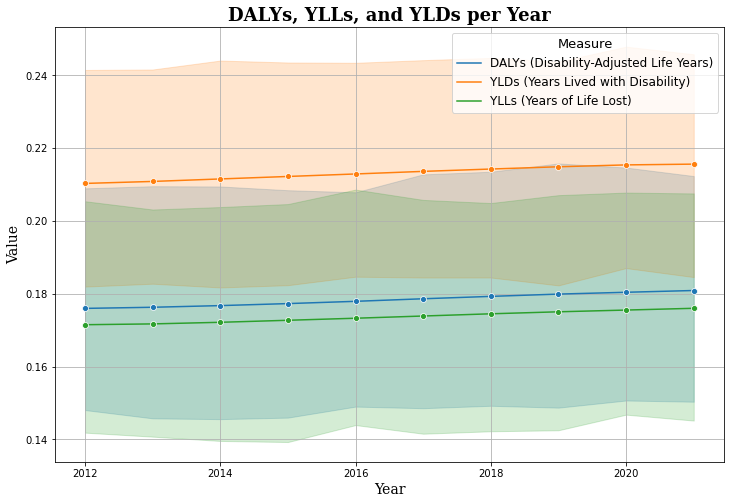

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot using seaborn
sns.lineplot(data=df_filtered, x='year', y='val', hue='measure_name', marker='o')

# Customize the plot
plt.title('DALYs, YLLs, and YLDs per Year', fontsize=18, fontfamily='serif', fontweight='bold', ha='center')
plt.xlabel('Year', fontsize=14, fontfamily='serif')
plt.ylabel('Value', fontsize=14, fontfamily='serif')
plt.legend(title='Measure', title_fontsize='13', fontsize='12')
plt.grid(True)

# Show the plot
plt.show()


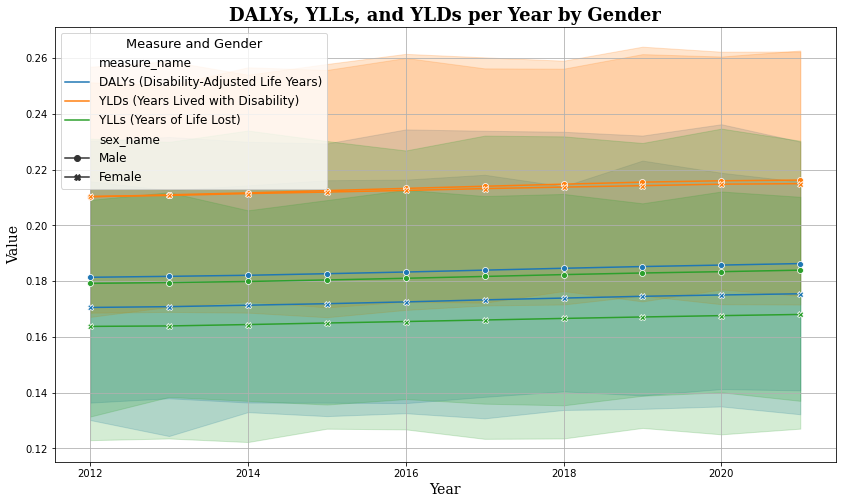

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot using seaborn, adding 'sex_name' to the hue and/or style
sns.lineplot(
    data=df_filtered, 
    x='year', 
    y='val', 
    hue='measure_name', 
    style='sex_name',  # Differentiates the lines by gender
    markers=True, 
    dashes=False
)

# Customize the plot
plt.title('DALYs, YLLs, and YLDs per Year by Gender', fontsize=18, fontfamily='serif', fontweight='bold', ha='center')
plt.xlabel('Year', fontsize=14, fontfamily='serif')
plt.ylabel('Value', fontsize=14, fontfamily='serif')
plt.legend(title='Measure and Gender', title_fontsize='13', fontsize='12')
plt.grid(True)

# Show the plot
plt.show()

In [19]:
# Aggregate the data by gender and measure
df_grouped = df_filtered.groupby(['sex_name', 'measure_name'])['val'].sum().reset_index()

# Check the aggregated data
print(df_grouped)


  sex_name                            measure_name         val
0   Female  DALYs (Disability-Adjusted Life Years)  129.727499
1   Female      YLDs (Years Lived with Disability)  159.606317
2   Female               YLLs (Years of Life Lost)  124.374809
3     Male  DALYs (Disability-Adjusted Life Years)  137.788133
4     Male      YLDs (Years Lived with Disability)  160.150405
5     Male               YLLs (Years of Life Lost)  136.086847


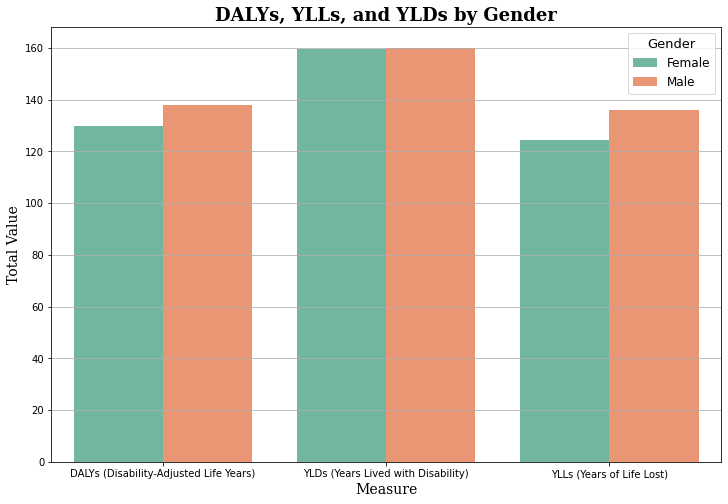

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot using seaborn
sns.barplot(
    data=df_grouped, 
    x='measure_name', 
    y='val', 
    hue='sex_name',
    palette='Set2'
)

# Customize the plot
plt.title('DALYs, YLLs, and YLDs by Gender', fontsize=18, fontfamily='serif', fontweight='bold', ha='center')
plt.xlabel('Measure', fontsize=14, fontfamily='serif')
plt.ylabel('Total Value', fontsize=14, fontfamily='serif')
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.grid(axis='y')

# Show the plot
plt.show()

In [21]:
# Aggregate the data by measure name
df_outcome_totals = df_filtered.groupby('measure_name')['val'].sum().reset_index()

# Sort the data to find the most common outcome
df_outcome_totals = df_outcome_totals.sort_values(by='val', ascending=False)

# Check the aggregated and sorted data
print(df_outcome_totals)


                             measure_name         val
1      YLDs (Years Lived with Disability)  319.756722
0  DALYs (Disability-Adjusted Life Years)  267.515632
2               YLLs (Years of Life Lost)  260.461656


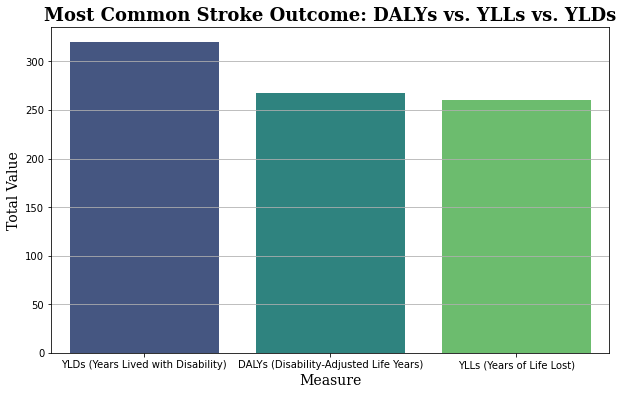

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the aggregated data
sns.barplot(
    data=df_outcome_totals, 
    x='measure_name', 
    y='val', 
    palette='viridis'
)

# Customize the plot
plt.title('Most Common Stroke Outcome: DALYs vs. YLLs vs. YLDs', fontsize=18, fontfamily='serif', fontweight='bold', ha='center')
plt.xlabel('Measure', fontsize=14, fontfamily='serif')
plt.ylabel('Total Value', fontsize=14, fontfamily='serif')
plt.grid(axis='y')

# Show the plot
plt.show()


In [23]:
# Aggregate the data by gender and measure name
df_gender_outcomes = df_filtered.groupby(['sex_name', 'measure_name'])['val'].sum().reset_index()

# Sort the data to find the most common outcome for each gender
df_gender_outcomes = df_gender_outcomes.sort_values(by='val', ascending=False)

# Check the aggregated and sorted data
print(df_gender_outcomes)


  sex_name                            measure_name         val
4     Male      YLDs (Years Lived with Disability)  160.150405
1   Female      YLDs (Years Lived with Disability)  159.606317
3     Male  DALYs (Disability-Adjusted Life Years)  137.788133
5     Male               YLLs (Years of Life Lost)  136.086847
0   Female  DALYs (Disability-Adjusted Life Years)  129.727499
2   Female               YLLs (Years of Life Lost)  124.374809


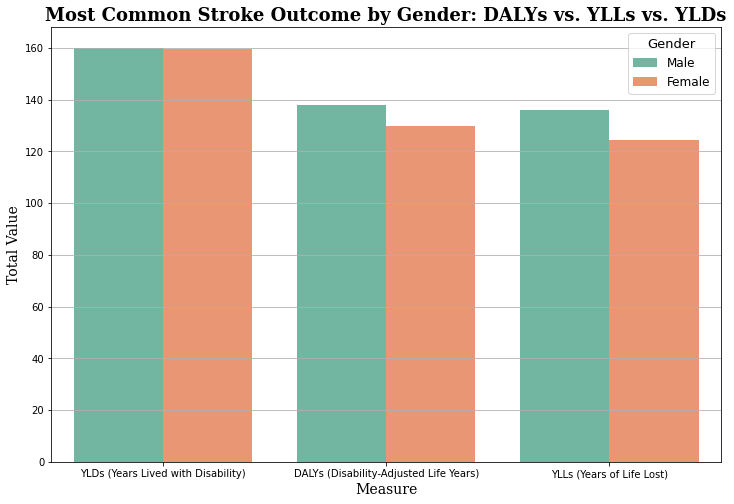

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the aggregated data by gender and measure
sns.barplot(
    data=df_gender_outcomes, 
    x='measure_name', 
    y='val', 
    hue='sex_name',
    palette='Set2'
)

# Customize the plot
plt.title('Most Common Stroke Outcome by Gender: DALYs vs. YLLs vs. YLDs', fontsize=18, fontfamily='serif', fontweight='bold', ha='center')
plt.xlabel('Measure', fontsize=14, fontfamily='serif')
plt.ylabel('Total Value', fontsize=14, fontfamily='serif')
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.grid(axis='y')

# Show the plot
plt.show()


In [25]:
########## DATA VISUALIZATION

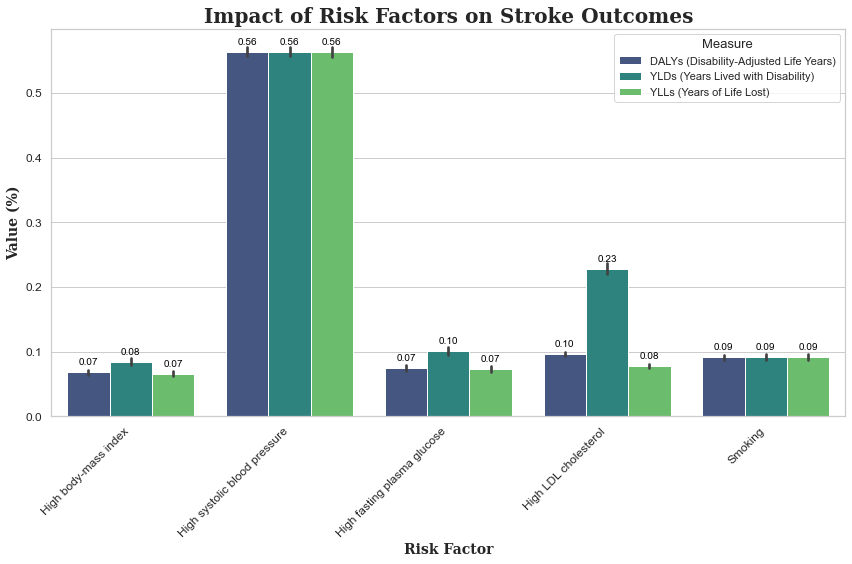

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style='whitegrid', palette='pastel')

# Distribution of measure values by risk factor
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='rei_name', y='val', hue='measure_name', data=df_cleaned[df_cleaned['cause_name'] == 'Stroke'], palette='viridis')

# Add title and labels
plt.title('Impact of Risk Factors on Stroke Outcomes', fontsize=20, fontweight='bold', family='serif')
plt.xlabel('Risk Factor', fontsize=14, fontweight='bold', family='serif')
plt.ylabel('Value (%)', fontsize=14, fontweight='bold', family='serif')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations on bars with precise formatting
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=10, 
                color='black')

plt.legend(title='Measure', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()


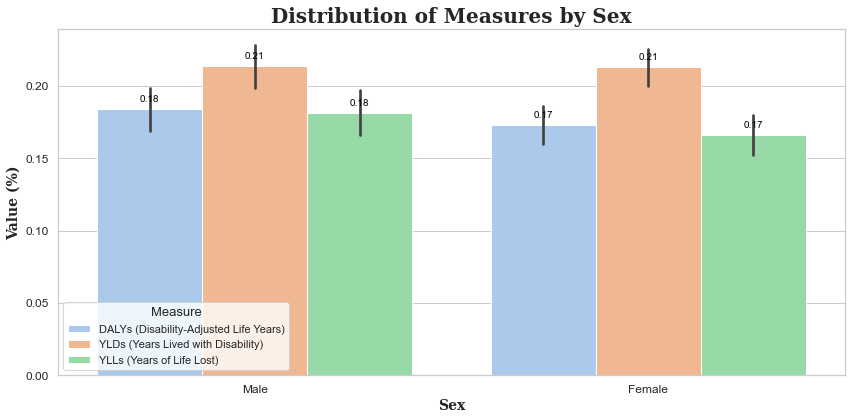

In [27]:
# Distribution of measures by Sex
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='sex_name', y='val', hue='measure_name', data=df_cleaned[df_cleaned['cause_name'] == 'Stroke'], palette='pastel')
plt.title('Distribution of Measures by Sex', fontsize=20, fontweight='bold', family='serif')
plt.xlabel('Sex', fontsize=14, fontweight='bold', family='serif')
plt.ylabel('Value (%)', fontsize=14, fontweight='bold', family='serif')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=10, 
                color='black')
plt.legend(title='Measure', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

In [28]:
############## CORRELATION PLOTS #####################

In [29]:
################################# DALY##########################################

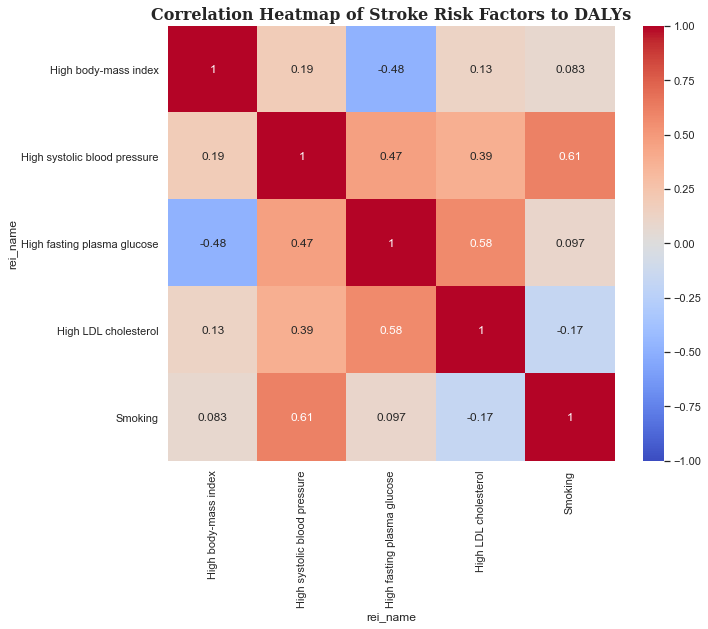

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target measure
target_measure = 'DALYs (Disability-Adjusted Life Years)'  # Example target measure

# Assuming these are the correct risk factor names under 'rei_name'
risk_factors = ['High body-mass index', 'High systolic blood pressure', 'High fasting plasma glucose', 'High LDL cholesterol', 'Smoking']


# Filter the dataset for the target measure
df_target = df_cleaned[df_cleaned['measure_name'] == target_measure]

# Filter rows where 'rei_name' matches the risk factors
df_filtered = df_target[df_target['rei_name'].isin(risk_factors)]

# Pivot the data to prepare features (risk factors) and target variable
df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()

# Check for any missing values and fill them if necessary
df_pivoted = df_pivoted.fillna(0)

# Now, df_pivoted should have the risk factors as columns
# Drop non-feature columns if necessary
X = df_pivoted[risk_factors]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stroke Risk Factors to DALYs', fontsize=16, fontweight='bold', family='serif')
plt.show()


In [31]:
################################# YLD #########################################################

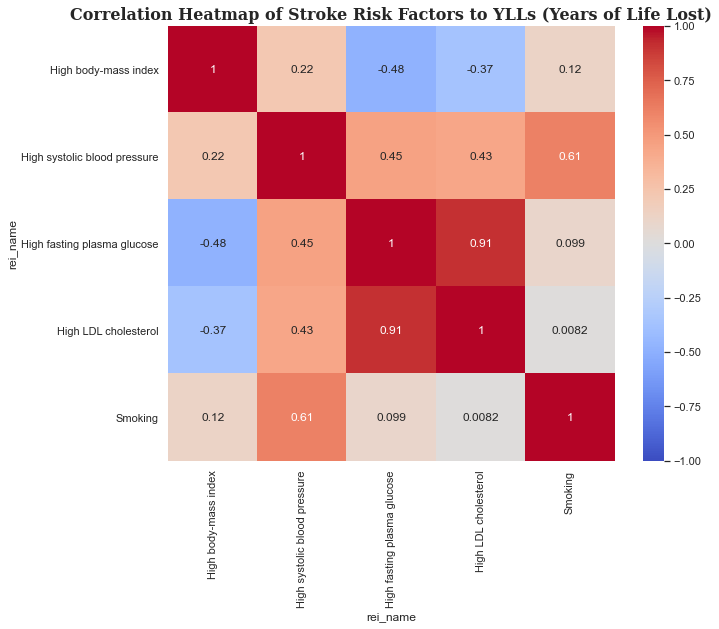

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (assuming 'df' is already loaded)

# Define the target measure
target_measure = 'YLLs (Years of Life Lost)'  # Example target measure

# Assuming these are the correct risk factor names under 'rei_name'
risk_factors = ['High body-mass index', 'High systolic blood pressure', 'High fasting plasma glucose', 'High LDL cholesterol', 'Smoking']

# Filter the dataset for the target measure
df_target = df_cleaned[df_cleaned['measure_name'] == target_measure]

# Filter rows where 'rei_name' matches the risk factors
df_filtered = df_target[df_target['rei_name'].isin(risk_factors)]

# Pivot the data to prepare features (risk factors) and target variable
df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()

# Check for any missing values and fill them if necessary
df_pivoted = df_pivoted.fillna(0)

# Now, df_pivoted should have the risk factors as columns
# Drop non-feature columns if necessary
X = df_pivoted[risk_factors]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stroke Risk Factors to YLLs (Years of Life Lost)', fontsize=16, fontweight='bold', family='serif')
plt.show()

In [33]:
############################### YLD #############################################

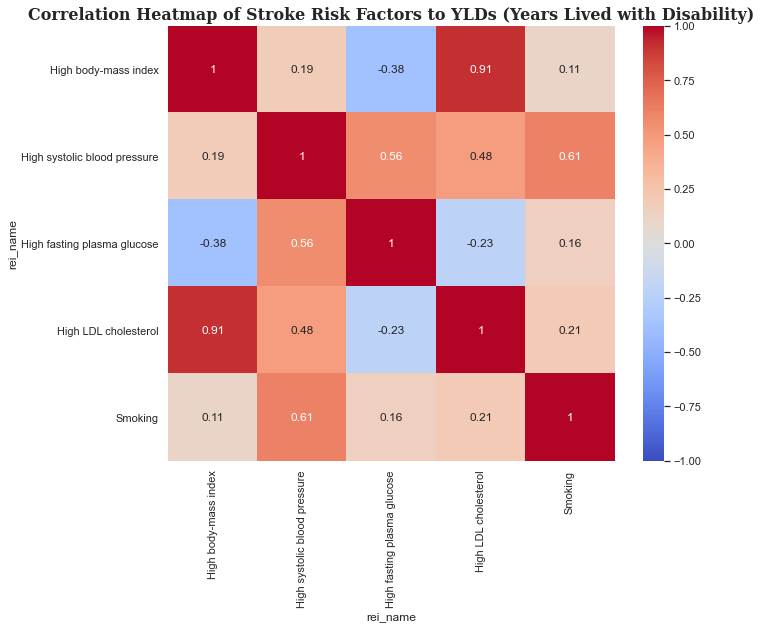

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target measure
target_measure = 'YLDs (Years Lived with Disability)'  # Example target measure

# Assuming these are the correct risk factor names under 'rei_name'
risk_factors = ['High body-mass index', 'High systolic blood pressure', 'High fasting plasma glucose', 'High LDL cholesterol', 'Smoking']

# Filter the dataset for the target measure
df_target = df_cleaned[df_cleaned['measure_name'] == target_measure]

# Filter rows where 'rei_name' matches the risk factors
df_filtered = df_target[df_target['rei_name'].isin(risk_factors)]

# Pivot the data to prepare features (risk factors) and target variable
df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()

# Check for any missing values and fill them if necessary
df_pivoted = df_pivoted.fillna(0)

# Now, df_pivoted should have the risk factors as columns
# Drop non-feature columns if necessary
X = df_pivoted[risk_factors]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stroke Risk Factors to YLDs (Years Lived with Disability)', fontsize=16, fontweight='bold', family='serif' )
plt.show()

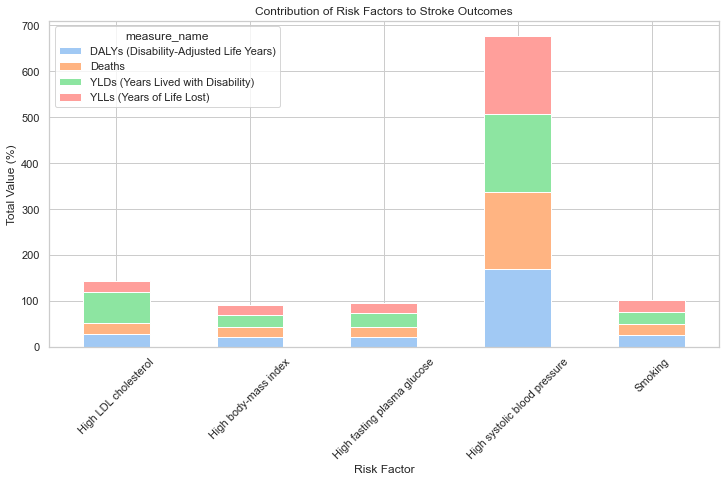

In [35]:
df_grouped = df.groupby(['rei_name', 'measure_name'])['val'].sum().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contribution of Risk Factors to Stroke Outcomes')
plt.xlabel('Risk Factor')
plt.ylabel('Total Value (%)')
plt.xticks(rotation=45)
plt.show()

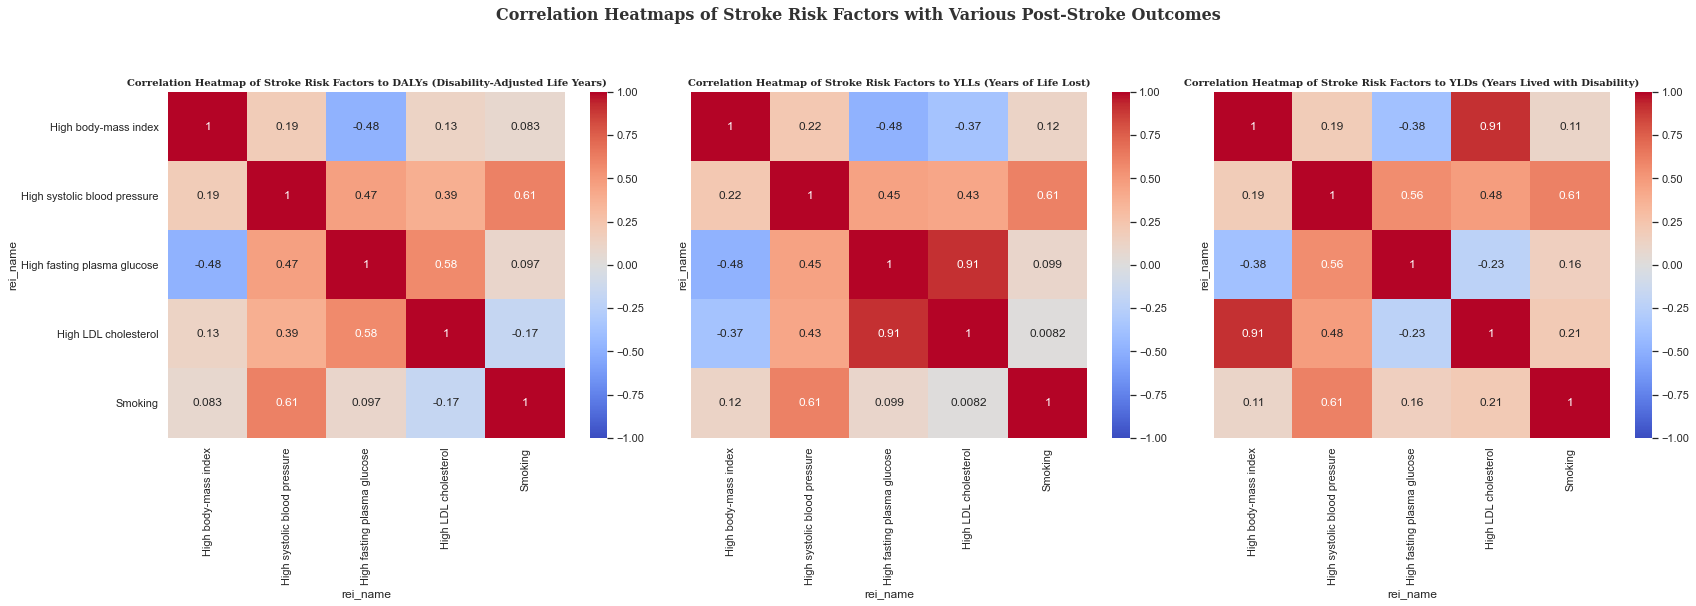

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define risk factors
risk_factors = ['High body-mass index', 'High systolic blood pressure', 'High fasting plasma glucose', 'High LDL cholesterol', 'Smoking']

# List of target measures
target_measures = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)

# Iterate over each target measure and create a heatmap
for i, target_measure in enumerate(target_measures):
    # Filter the dataset for the target measure
    df_target = df_cleaned[df_cleaned['measure_name'] == target_measure]
    
    # Filter rows where 'rei_name' matches the risk factors
    df_filtered = df_target[df_target['rei_name'].isin(risk_factors)]
    
    # Pivot the data to prepare features (risk factors) and target variable
    df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()
    
    # Check for any missing values and fill them if necessary
    df_pivoted = df_pivoted.fillna(0)
    
    # Now, df_pivoted should have the risk factors as columns
    X = df_pivoted[risk_factors]
    
    # Compute the correlation matrix
    correlation_matrix = X.corr()
    
    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap of Stroke Risk Factors to {target_measure}', fontsize=10, fontweight='bold', family='serif')

# Add a title to the entire figure
fig.suptitle('Correlation Heatmaps of Stroke Risk Factors with Various Post-Stroke Outcomes', 
             fontsize=16, fontweight='bold', fontfamily='serif', color="#323232", y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


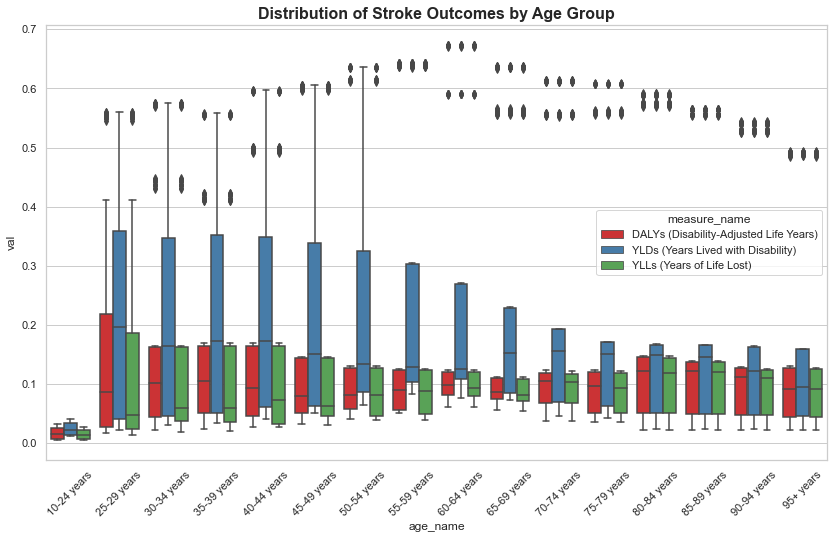

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned, x='age_name', y='val', hue='measure_name', palette='Set1')
plt.title('Distribution of Stroke Outcomes by Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


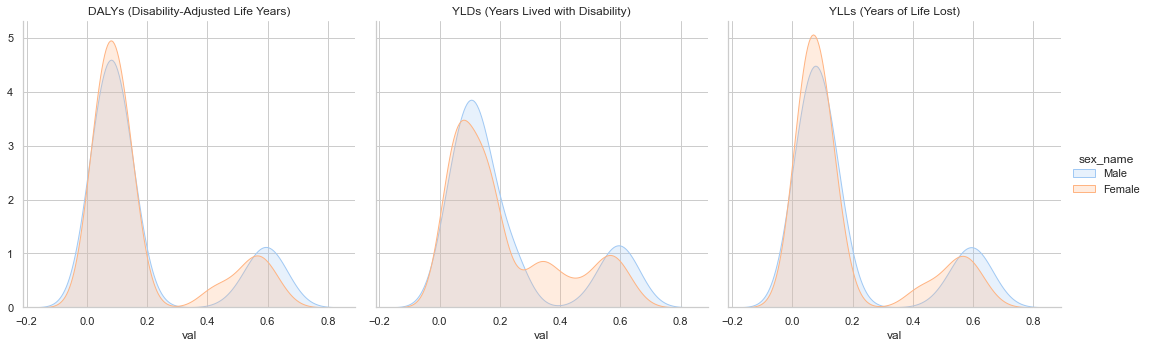

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_cleaned, col='measure_name', hue='sex_name', col_wrap=3, height=5)
g.map(sns.kdeplot, 'val', shade=True)
g.add_legend()
g.set_titles('{col_name}')
plt.show()


In [39]:
!pip install plotly

In [40]:
#Radar Chart
#Compare the performance of different risk factors on various outcomes.

import plotly.graph_objects as go

categories = ['DALYs (Disability-Adjusted Life Years)', 'YLDs (Years Lived with Disability)', 'YLLs (Years of Life Lost)']
fig = go.Figure()

for risk_factor in df_cleaned['rei_name'].unique():
    fig.add_trace(go.Scatterpolar(
        r=df_cleaned[df_cleaned['rei_name'] == risk_factor].groupby('measure_name')['val'].mean(),
        theta=categories,
        fill='toself',
        name=risk_factor
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df_cleaned['val'])]
        )),
    showlegend=True,
    title="Radar Chart of Stroke Outcomes by Risk Factors"
)
fig.show()

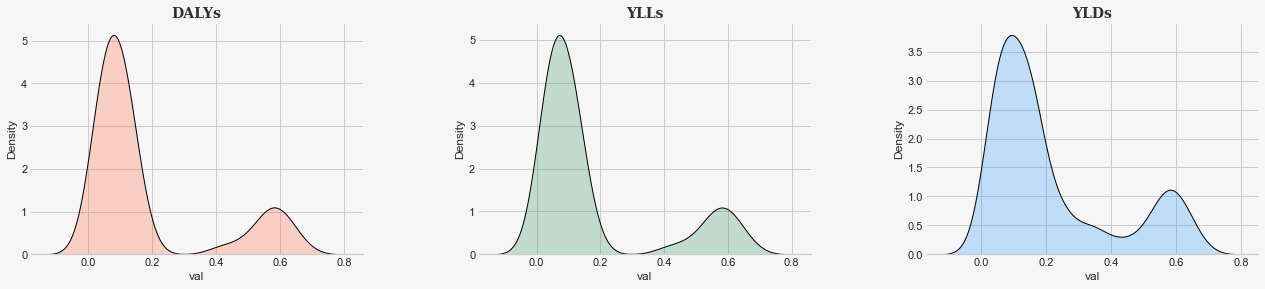

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd

# Sample data (replace this with your actual data)
# df_cleaned should be loaded with relevant columns for DALYs, YLLs, YLDs

# Create a figure with a grid of subplots
fig = plt.figure(figsize=(22, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)

# Create subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)  # Figure background color

# Define colors for different outcomes
dalys_color = "#FF5733"  # Redish color for DALYs
ylls_color = "#2E8B57"  # Greenish color for YLLs
ylds_color = "#1E90FF"  # Blueish color for YLDs

# Replace with your actual target measures
target_measures = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']

# Create a list of target measure titles
measure_titles = {
    'DALYs (Disability-Adjusted Life Years)': 'DALYs',
    'YLLs (Years of Life Lost)': 'YLLs',
    'YLDs (Years Lived with Disability)': 'YLDs'
}

for idx, measure in enumerate(target_measures):
    df_target = df_cleaned[df_cleaned['measure_name'] == measure]
    
    # Filter rows by age and gender if applicable
    df_filtered = df_target
    
    # Pivot the data if necessary
    df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()
    df_pivoted = df_pivoted.fillna(0)
    
    # KDE Plot
    if measure == 'DALYs (Disability-Adjusted Life Years)':
        ax = ax0
        color = dalys_color
    elif measure == 'YLLs (Years of Life Lost)':
        ax = ax1
        color = ylls_color
    else:
        ax = ax2
        color = ylds_color
    
    # KDE plot for the measure
    sns.kdeplot(df_target['val'], ax=ax, color=color, shade=True, ec='black')
    ax.set_title(measure_titles[measure], fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# Additional plots for comparisons or breakdowns by other features (e.g., age, gender) can be added similarly
# For demonstration, using KDE plots for different outcomes

# Title subplot (ax3) for overall figure description
ax3.spines["bottom"].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.text(0.5, 0.6, 'Visualization of Post-Stroke Outcomes\n\n', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

# Clear remaining subplots if not used
for i in range(3, 9):
    ax = locals()["ax" + str(i)]
    ax.set_visible(False)

# Tidy up
for s in ["top", "right", "left"]:
    for i in range(0, 9):
        locals()["ax" + str(i)].spines[s].set_visible(False)

for i in range(0, 9):
    locals()["ax" + str(i)].set_facecolor(background_color)
    locals()["ax" + str(i)].tick_params(axis='both', which='both', length=0)

plt.show()


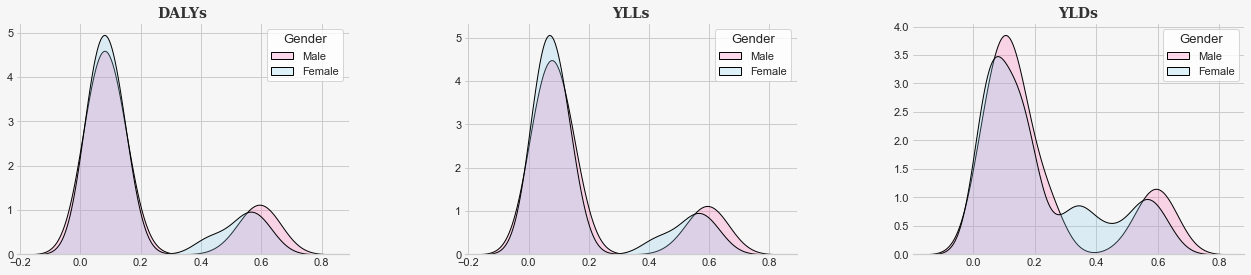

In [42]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd

# Sample data (replace this with your actual data)
# df_cleaned should be loaded with relevant columns for DALYs, YLLs, YLDs

# Create a figure with a grid of subplots
fig = plt.figure(figsize=(22, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)

# Create subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)  # Figure background color

# Define colors for different outcomes
dalys_color = "#FF5733"  # Redish color for DALYs
ylls_color = "#2E8B57"  # Greenish color for YLLs
ylds_color = "#1E90FF"  # Blueish color for YLDs

# Define colors for gender
gender_colors = {
    'Male': "#FF69B4",  # Light Pink for Male
    'Female': "#87CEEB"  # Light Blue for Female
}

# Replace with your actual target measures
target_measures = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']

# Create a list of target measure titles
measure_titles = {
    'DALYs (Disability-Adjusted Life Years)': 'DALYs',
    'YLLs (Years of Life Lost)': 'YLLs',
    'YLDs (Years Lived with Disability)': 'YLDs'
}

# Plot KDEs for each measure
for idx, measure in enumerate(target_measures):
    df_target = df_cleaned[df_cleaned['measure_name'] == measure]
    
    # Create subplots based on the measure
    if measure == 'DALYs (Disability-Adjusted Life Years)':
        ax = ax0
        color = dalys_color
    elif measure == 'YLLs (Years of Life Lost)':
        ax = ax1
        color = ylls_color
    else:
        ax = ax2
        color = ylds_color

    # KDE Plot by Gender
    for gender, gcolor in gender_colors.items():
        df_gender = df_target[df_target['sex_name'] == gender]
        sns.kdeplot(df_gender['val'], ax=ax, color=gcolor, label=f'{gender}', shade=True, ec='black')
    
    ax.set_title(measure_titles[measure], fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Gender', title_fontsize='13', fontsize='11')

# Title subplot (ax3) for overall figure description
ax3.spines["bottom"].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.text(0.5, 0.6, 'Visualization of Post-Stroke Outcomes by Gender\n\n', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

# Clear remaining subplots if not used
for i in range(3, 9):
    ax = locals()["ax" + str(i)]
    ax.set_visible(False)

# Tidy up
for s in ["top", "right", "left"]:
    for i in range(0, 9):
        locals()["ax" + str(i)].spines[s].set_visible(False)

for i in range(0, 9):
    locals()["ax" + str(i)].set_facecolor(background_color)
    locals()["ax" + str(i)].tick_params(axis='both', which='both', length=0)

plt.show()


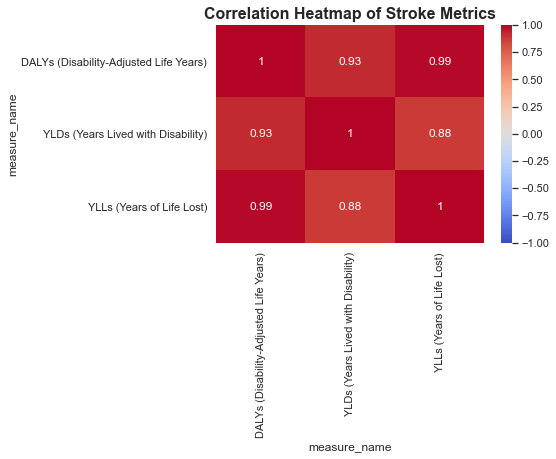

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for relevant risk factors and metrics
df_metrics = df_cleaned[df_cleaned['measure_name'].isin(target_measures)]
df_pivoted = df_metrics.pivot_table(index=['age_name', 'sex_name'], columns='measure_name', values='val').reset_index()

# Compute the correlation matrix
correlation_matrix = df_pivoted.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stroke Metrics', fontsize=16, fontweight='bold')
plt.show()


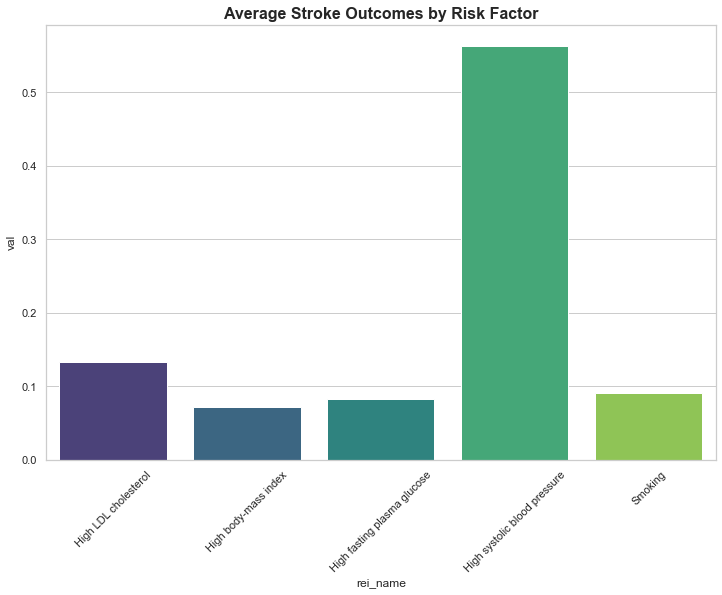

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_avg = df_cleaned.groupby('rei_name')['val'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg, x='rei_name', y='val', palette='viridis')
plt.title('Average Stroke Outcomes by Risk Factor', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


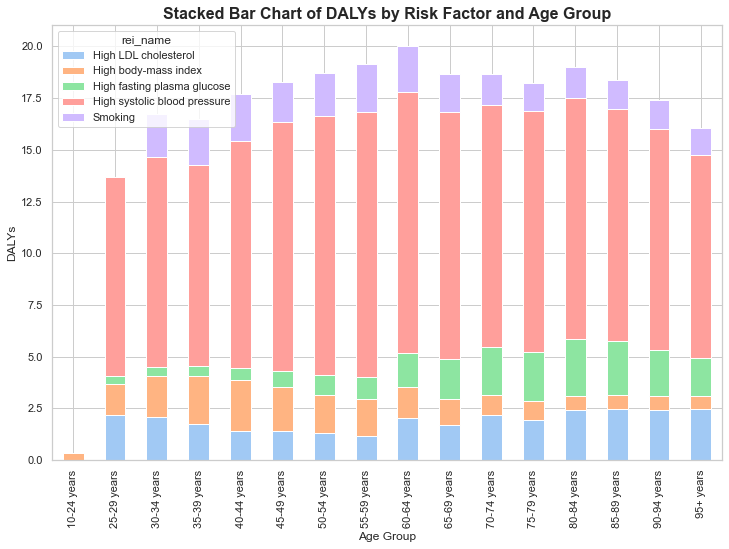

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df_stacked = df_cleaned[df_cleaned['measure_name'] == 'DALYs (Disability-Adjusted Life Years)']
df_stacked = df_stacked.pivot_table(index='age_name', columns='rei_name', values='val', aggfunc='sum').fillna(0)

df_stacked.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of DALYs by Risk Factor and Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('DALYs')
plt.show()


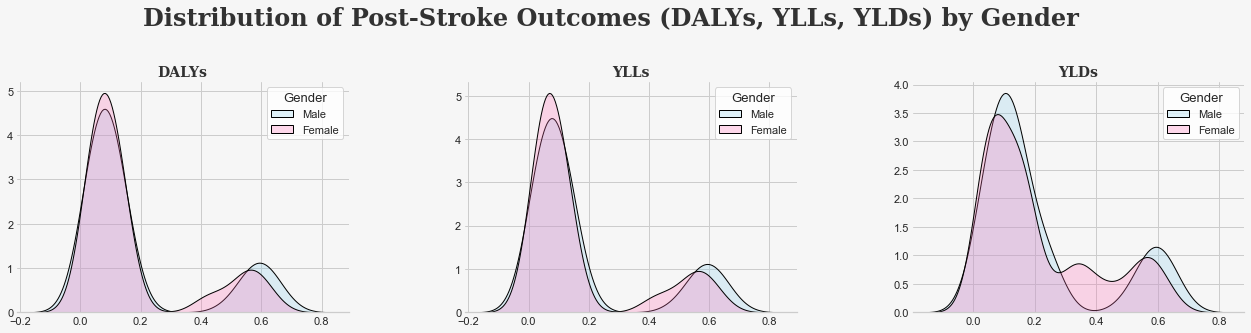

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual data)
# df_cleaned should be loaded with relevant columns for DALYs, YLLs, YLDs

# Create a figure with a grid of subplots
fig = plt.figure(figsize=(22, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)

# Create subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)  # Figure background color

# Define colors for different outcomes
dalys_color = "#FF5733"  # Redish color for DALYs
ylls_color = "#2E8B57"  # Greenish color for YLLs
ylds_color = "#1E90FF"  # Blueish color for YLDs

# Define colors for gender
gender_colors = {
    'Male': "#87CEEB",  # Light Pink for Male
    'Female': "#FF69B4"  # Light Blue for Female
}

# Replace with your actual target measures
target_measures = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']

# Create a list of target measure titles
measure_titles = {
    'DALYs (Disability-Adjusted Life Years)': 'DALYs',
    'YLLs (Years of Life Lost)': 'YLLs',
    'YLDs (Years Lived with Disability)': 'YLDs'
}

# Plot KDEs for each measure
for idx, measure in enumerate(target_measures):
    df_target = df_cleaned[df_cleaned['measure_name'] == measure]
    
    # Create subplots based on the measure
    if measure == 'DALYs (Disability-Adjusted Life Years)':
        ax = ax0
        color = dalys_color
    elif measure == 'YLLs (Years of Life Lost)':
        ax = ax1
        color = ylls_color
    else:
        ax = ax2
        color = ylds_color

    # KDE Plot by Gender
    for gender, gcolor in gender_colors.items():
        df_gender = df_target[df_target['sex_name'] == gender]
        sns.kdeplot(df_gender['val'], ax=ax, color=gcolor, label=f'{gender}', shade=True, ec='black')
    
    ax.set_title(measure_titles[measure], fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Gender', title_fontsize='13', fontsize='11')

# Title subplot (ax3) for overall figure description
ax3.spines["bottom"].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.text(0.5, 0.6, 'Visualization of Post-Stroke Outcomes by Gender\n\n', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

# Clear remaining subplots if not used
for i in range(3, 9):
    ax = locals()["ax" + str(i)]
    ax.set_visible(False)

# Tidy up
for s in ["top", "right", "left"]:
    for i in range(0, 9):
        locals()["ax" + str(i)].spines[s].set_visible(False)

for i in range(0, 9):
    locals()["ax" + str(i)].set_facecolor(background_color)
    locals()["ax" + str(i)].tick_params(axis='both', which='both', length=0)

# Add a title to the entire figure
fig.suptitle('Distribution of Post-Stroke Outcomes (DALYs, YLLs, YLDs) by Gender', 
             fontsize=24, fontweight='bold', fontfamily='serif', color="#323232", y=0.95)

plt.show()


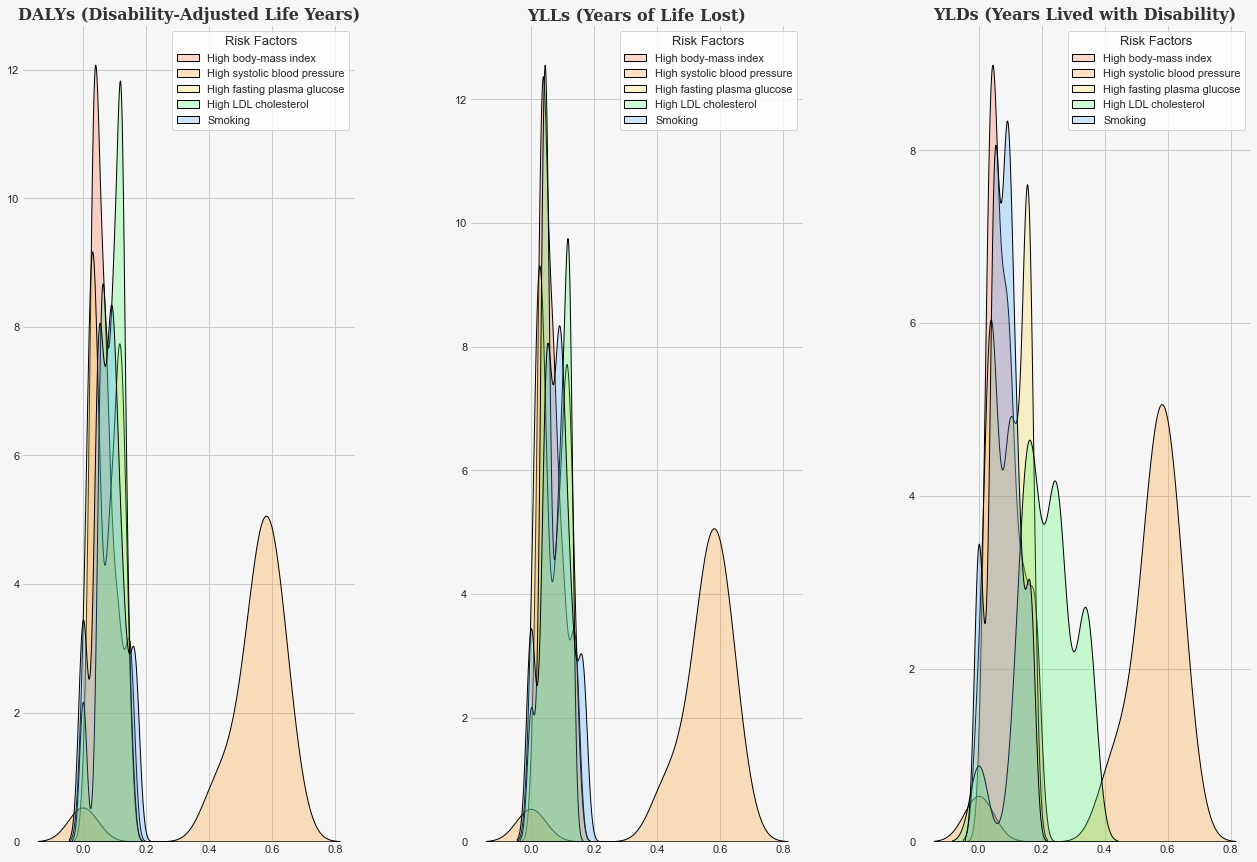

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd

# Load your dataset into a DataFrame (assuming 'df_cleaned' is already loaded)

# Define the target measures
measures = ['DALYs (Disability-Adjusted Life Years)', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']

# Create a figure and subplots
fig = plt.figure(figsize=(22, 15))
gs = fig.add_gridspec(1, 3)  # 1 row, 3 columns for the measures
gs.update(wspace=0.35)  # Adjust space between plots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color)  # Figure background color

# Define colors for the risk factors
risk_factors_colors = {
    'High body-mass index': "#FF5733",
    'High systolic blood pressure': "#FF8C00",
    'High fasting plasma glucose': "#FFDA33",
    'High LDL cholesterol': "#33FF57",
    'Smoking': "#33A1FF"
}

# Function to plot KDE for a specific measure
def plot_kde(ax, measure, risk_factors_colors, df_cleaned):
    df_target = df_cleaned[df_cleaned['measure_name'] == measure]
    df_filtered = df_target[df_target['rei_name'].isin(risk_factors_colors.keys())]

    # Pivot the data for plotting
    df_pivoted = df_filtered.pivot_table(index=['location_name', 'sex_name', 'age_name', 'year'], columns='rei_name', values='val').reset_index()
    df_pivoted = df_pivoted.fillna(0)

    # Plot KDE for each risk factor
    for factor, color in risk_factors_colors.items():
        if factor in df_pivoted.columns:
            sns.kdeplot(df_pivoted[factor], ax=ax, color=color, label=factor, shade=True, ec='black')

    ax.set_title(measure, fontsize=16, fontweight='bold', fontfamily='serif', color="#323232")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Risk Factors', title_fontsize='13', fontsize='11')

# Plot KDE for each measure
plot_kde(ax0, measures[0], risk_factors_colors, df_cleaned)
plot_kde(ax1, measures[1], risk_factors_colors, df_cleaned)
plot_kde(ax2, measures[2], risk_factors_colors, df_cleaned)

# Tidy up
for ax in [ax0, ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_facecolor(background_color)
    ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()


In [39]:
######################################FEATURE IMPORTANCE #########################################################

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df_cleaned[['age_id', 'sex_id', 'year', 'rei_id']]
y = df_cleaned['val']

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importance)

        importance
rei_id    0.942250
age_id    0.037029
sex_id    0.014060
year      0.006662


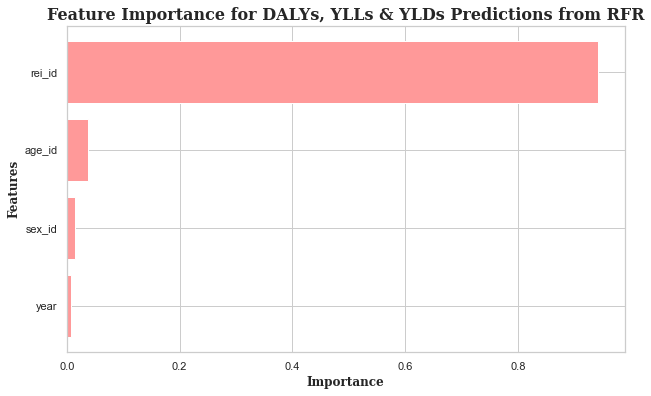

In [41]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'], color='#ff9999')  # Brighter pink color
plt.xlabel('Importance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Features', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Feature Importance for DALYs, YLLs & YLDs Predictions from RFR', fontsize=16, fontweight='bold', family='serif')
plt.gca().invert_yaxis()
plt.show()


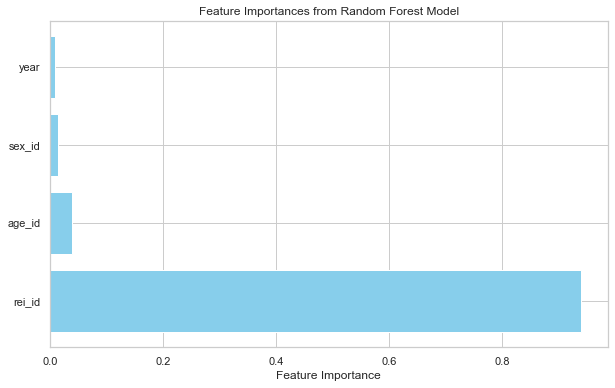

In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest Model')
plt.show()

In [43]:
######################################PREDICTIONS################################################################

In [44]:
############################# RANDOM FOREST REGRESSOR ###################################################

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Feature and target variables
X = df_cleaned[['sex_id', 'age_id', 'rei_id','measure_id']]
y = df_cleaned['val']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Mean Squared Error (MSE):',mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)


Mean Squared Error (MSE): 1.0888667766170077e-05
Root Mean Squared Error (RMSE): 0.0032997981402155614
Mean Absolute Error (MAE): 0.002186329838006315
R-squared (R²): 0.9997042912564638


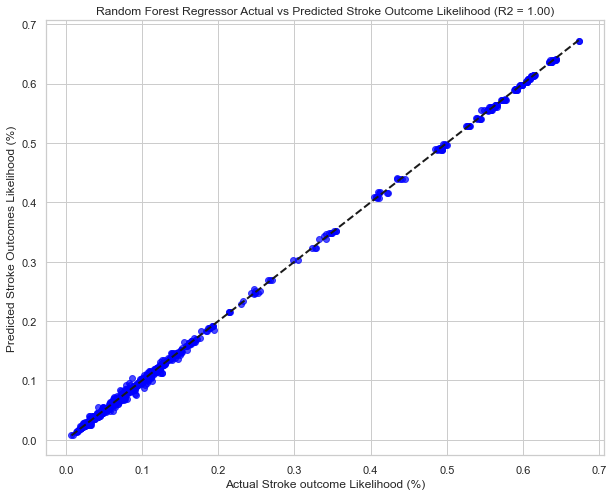

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
 
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
 
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcomes Likelihood (%)')
plt.title(f'Random Forest Regressor Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
plt.grid(True)
plt.show()

In [47]:
############################ GRADIENT BOOSTING REGRESSOR ###################################################

Mean Squared Error: 0.0005269818001884714
Mean Absolute Error: 0.017322737159718198
Root Mean Squared Error: 0.022956084164954427
R-squared (R2) Score: 0.9856885039247518


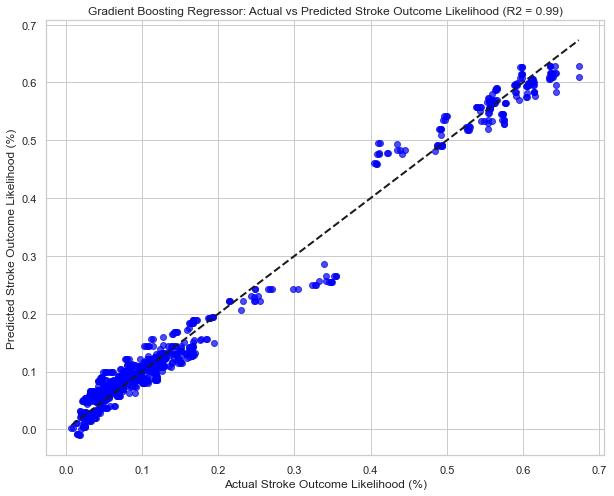

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Create Gradient Boosting Regressor with default parameters
regressor = GradientBoostingRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke Outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcome Likelihood (%)')
plt.title(f'Gradient Boosting Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
plt.grid(True)
plt.show()


In [49]:
############################# DECISION TREES REGRESSOR ################################################################

Mean Squared Error: 1.080730786727127e-05
Mean Absolute Error: 0.0021810954586268575
Root Mean Squared Error: 0.003287447013606648
R-squared (R2) Score: 0.9997065007860402


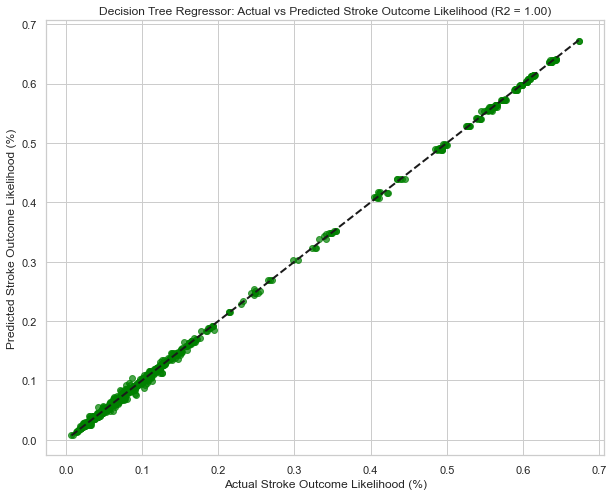

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Create Decision Tree Regressor with default parameters
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke Outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcome Likelihood (%)')
plt.title(f'Decision Tree Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
plt.grid(True)
plt.show()

In [51]:
############################# XG Boost  REGRESSOR ################################################################

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Create XGBoost Regressor with default parameters
regressor = XGBRegressor()

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke Outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcome Likelihood (%)')
plt.title(f'XGBoost Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
plt.grid(True)
plt.show()


NameError: name 'X_train' is not defined

In [73]:
############################# KNeighbors Regressor  ################################################################

Mean Squared Error: 1.1517510620980008e-05
Mean Absolute Error: 0.0022077580484398777
Root Mean Squared Error: 0.0033937458097182244
R-squared (R2) Score: 0.9996872134711486


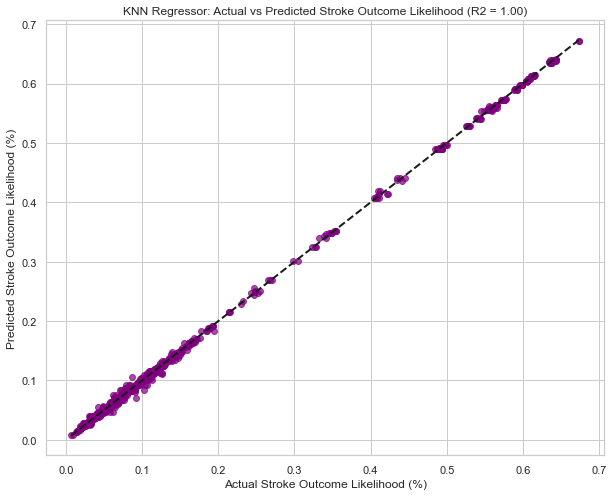

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create K-Nearest Neighbors Regressor with default parameters
regressor = KNeighborsRegressor()

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke Outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcome Likelihood (%)')
plt.title(f'KNN Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
plt.grid(True)
plt.show()

In [74]:
############################# PRESENTATIONS #######################################3

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Example data (replace with your actual data)
# X, y = your_features, your_target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

# Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

# XGBoost Regressor
model_xgbr = xgb.XGBRegressor(random_state=42)
model_xgbr.fit(X_train, y_train)
y_pred_xgbr = model_xgbr.predict(X_test)

# Decision Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)


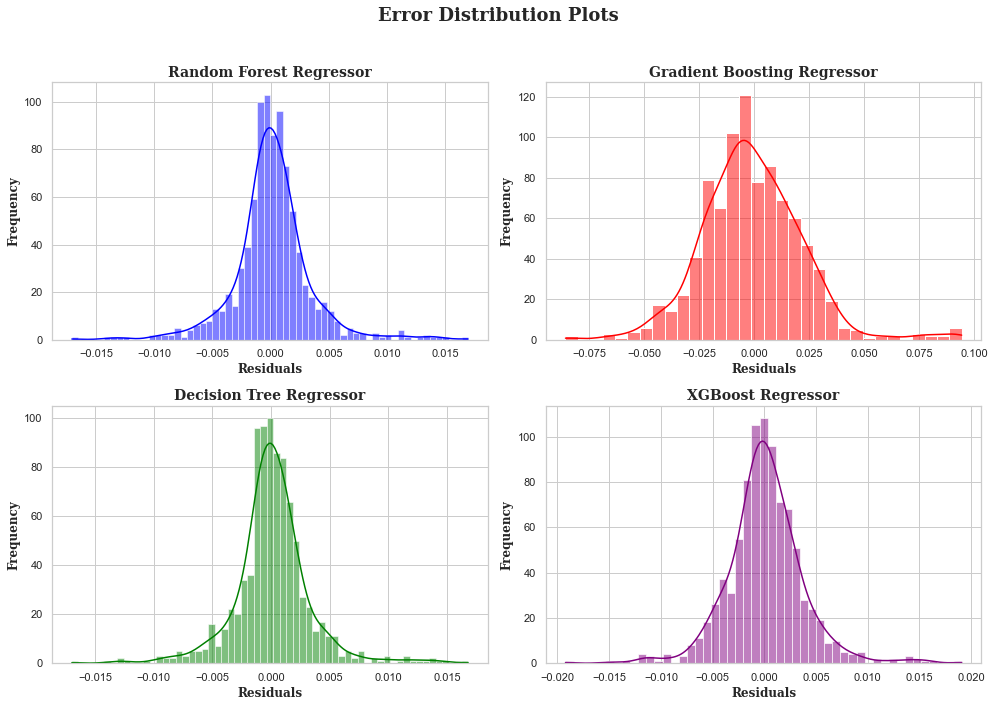

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_rfr = y_test - y_pred_rfr
residuals_gbr = y_test - y_pred_gbr
residuals_dtr = y_test - y_pred_dtr
residuals_xgbr = y_test - y_pred_xgbr

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Error Distribution Plots', fontsize=18, fontfamily='serif', fontweight='bold')

sns.histplot(residuals_rfr, kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Random Forest Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[0, 0].set_xlabel('Residuals', fontsize=12, fontfamily='serif', fontweight='bold')
axs[0, 0].set_ylabel('Frequency', fontsize=12, fontfamily='serif', fontweight='bold')

sns.histplot(residuals_gbr, kde=True, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Gradient Boosting Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[0, 1].set_xlabel('Residuals', fontsize=12, fontfamily='serif', fontweight='bold')
axs[0, 1].set_ylabel('Frequency', fontsize=12, fontfamily='serif', fontweight='bold')

sns.histplot(residuals_dtr, kde=True, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Decision Tree Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[1, 0].set_xlabel('Residuals', fontsize=12, fontfamily='serif', fontweight='bold')
axs[1, 0].set_ylabel('Frequency', fontsize=12, fontfamily='serif', fontweight='bold')

sns.histplot(residuals_xgbr, kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('XGBoost Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[1, 1].set_xlabel('Residuals', fontsize=12, fontfamily='serif', fontweight='bold')
axs[1, 1].set_ylabel('Frequency', fontsize=12, fontfamily='serif', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


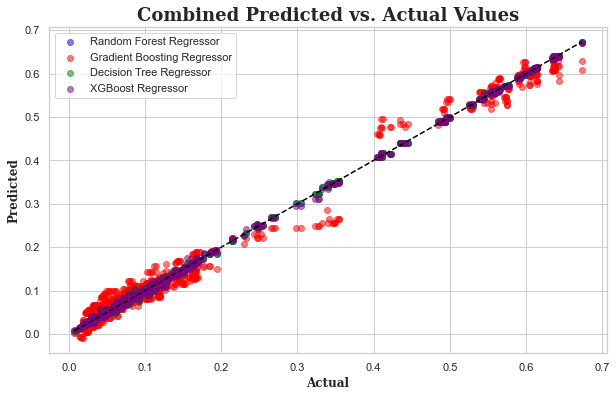

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5, label='Random Forest Regressor')
plt.scatter(y_test, y_pred_gbr, color='red', alpha=0.5, label='Gradient Boosting Regressor')
plt.scatter(y_test, y_pred_dtr, color='green', alpha=0.5, label='Decision Tree Regressor')
plt.scatter(y_test, y_pred_xgbr, color='purple', alpha=0.5, label='XGBoost Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Combined Predicted vs. Actual Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


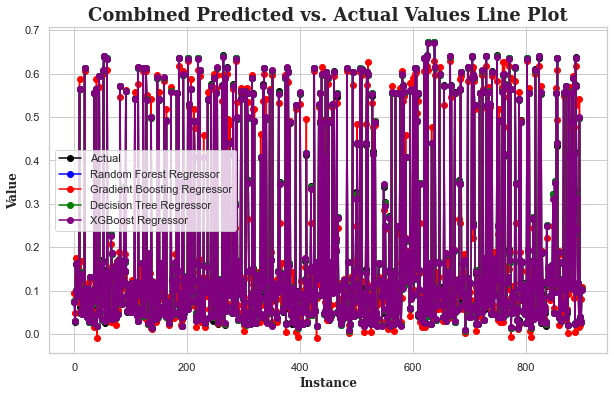

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='black', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred_rfr, marker='o', linestyle='-', color='blue', label='Random Forest Regressor')
plt.plot(np.arange(len(y_test)), y_pred_gbr, marker='o', linestyle='-', color='red', label='Gradient Boosting Regressor')
plt.plot(np.arange(len(y_test)), y_pred_dtr, marker='o', linestyle='-', color='green', label='Decision Tree Regressor')
plt.plot(np.arange(len(y_test)), y_pred_xgbr, marker='o', linestyle='-', color='purple', label='XGBoost Regressor')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Combined Predicted vs. Actual Values Line Plot', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


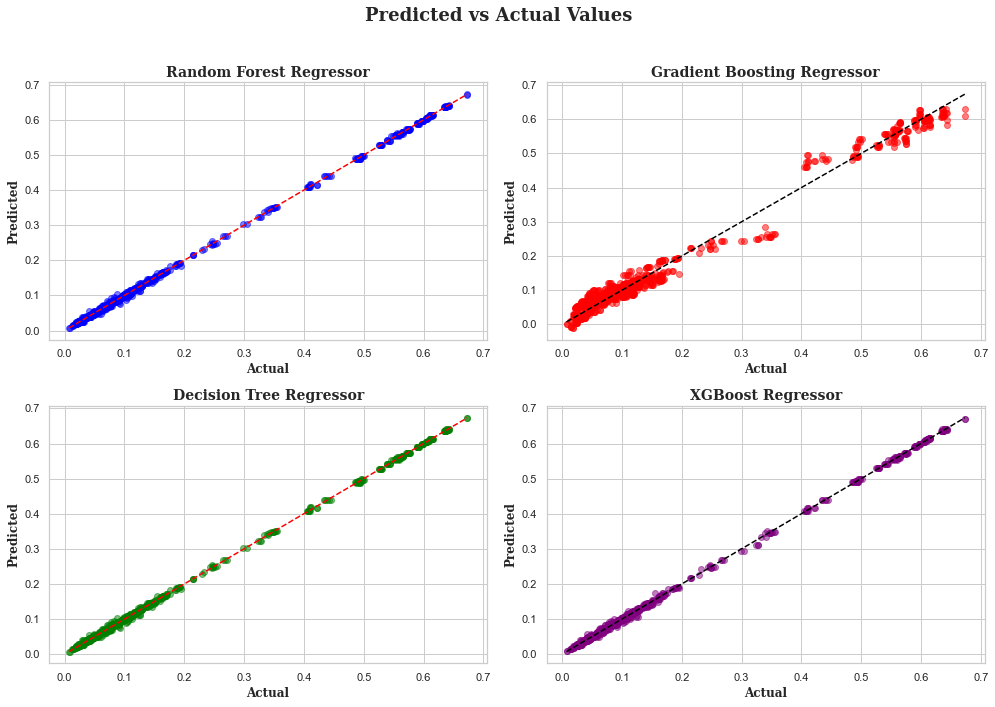

In [58]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Predicted vs Actual Values', fontsize=18, fontfamily='serif', fontweight='bold')

# Random Forest Regressor
axs[0, 0].scatter(y_test, y_pred_rfr, color='blue', alpha=0.5)
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[0, 0].set_title('Random Forest Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[0, 0].set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
axs[0, 0].set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')

# Gradient Boosting Regressor
axs[0, 1].scatter(y_test, y_pred_gbr, color='red', alpha=0.5)
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
axs[0, 1].set_title('Gradient Boosting Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[0, 1].set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
axs[0, 1].set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')

# Decision Tree Regressor
axs[1, 0].scatter(y_test, y_pred_dtr, color='green', alpha=0.5)
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[1, 0].set_title('Decision Tree Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[1, 0].set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
axs[1, 0].set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')

# XGBoost Regressor
axs[1, 1].scatter(y_test, y_pred_xgbr, color='purple', alpha=0.5)
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
axs[1, 1].set_title('XGBoost Regressor', fontsize=14, fontfamily='serif', fontweight='bold')
axs[1, 1].set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
axs[1, 1].set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Mean Squared Error: 0.034701897528031926
Mean Absolute Error: 0.13529815648492907
Root Mean Squared Error: 0.1862844532644416
R-squared (R2) Score: 0.057584018843769735


Text(0.5, 1.0, 'Support Vector Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = 0.06)')

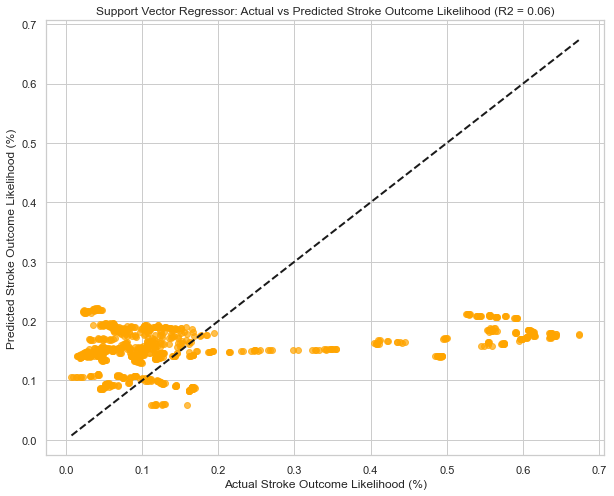

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Create Support Vector Regressor with default parameters
regressor = SVR()

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stroke Outcome Likelihood (%)')
plt.ylabel('Predicted Stroke Outcome Likelihood (%)')
plt.title(f'Support Vector Regressor: Actual vs Predicted Stroke Outcome Likelihood (R2 = {r2:.2f})')
